<a href="https://colab.research.google.com/github/Rithvikns/Machine_Learning/blob/main/Supervised_Learning/Both_classification_Regression/SVM/solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

### PART 1: SVM for Classification ###
print("=== SVM for Classification ===")

# Generate synthetic classification data
X_class, y_class = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_class, y_train_class)

# Predict on test data
y_pred_class = svm_classifier.predict(X_test_class)

=== SVM for Classification ===


In [4]:
# Compute accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {accuracy:.2f}")

# Plot decision boundary
def plot_svm_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM Classification Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



Classification Accuracy: 0.85


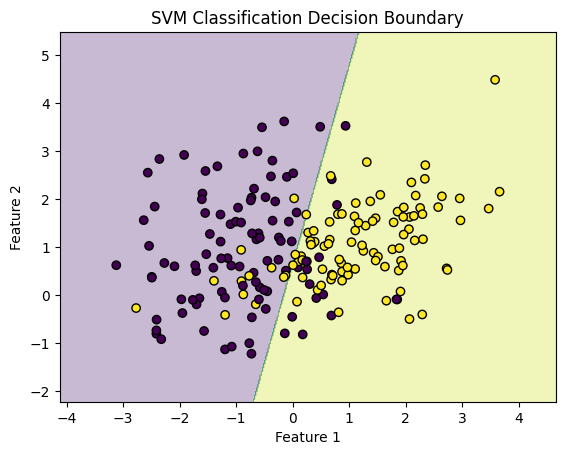


=== SVM for Regression ===


SVR(C=100, gamma=0.1)

In [5]:
plot_svm_decision_boundary(X_class, y_class, svm_classifier)

### PART 2: SVM for Regression ###
print("\n=== SVM for Regression ===")

# Generate synthetic regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train SVR model with RBF kernel
svm_regressor = SVR(kernel='rbf', C=100, gamma=0.1)
svm_regressor.fit(X_train_reg, y_train_reg)

Regression Mean Squared Error: 107.22


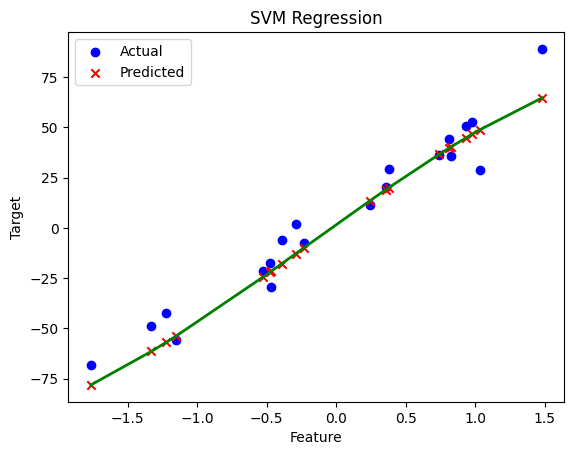

In [6]:
# Predict on test data
y_pred_reg = svm_regressor.predict(X_test_reg)

# Compute Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Mean Squared Error: {mse:.2f}")

# Plot Regression Results
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Actual')
plt.scatter(X_test_reg, y_pred_reg, color='red', marker='x', label='Predicted')
plt.plot(np.sort(X_test_reg, axis=0), svm_regressor.predict(np.sort(X_test_reg, axis=0)), color='green', linewidth=2)
plt.title("SVM Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()